In [28]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [29]:
creditdf = pd.read_csv("credit-svm.csv")
#creditdf = creditdf[['age','credit_history','personal_status','job','credit_amount','result']]
display(creditdf.head())

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,result
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,1
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,0
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,1
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,1
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,0


'male single'           548
'female div/dep/mar'    310
'male mar/wid'           92
'male div/sep'           50
Name: personal_status, dtype: int64


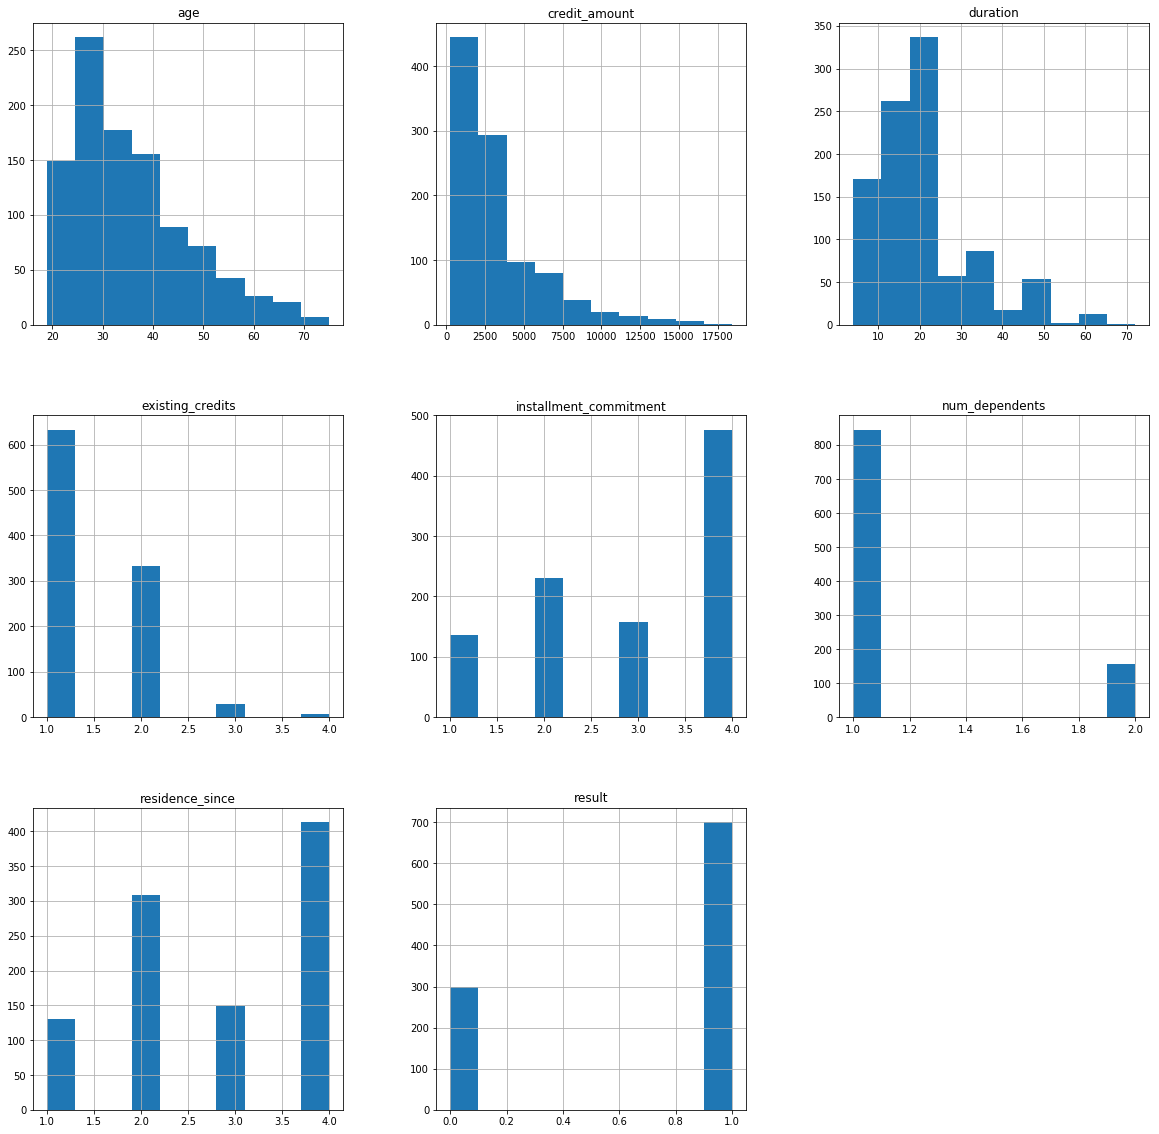

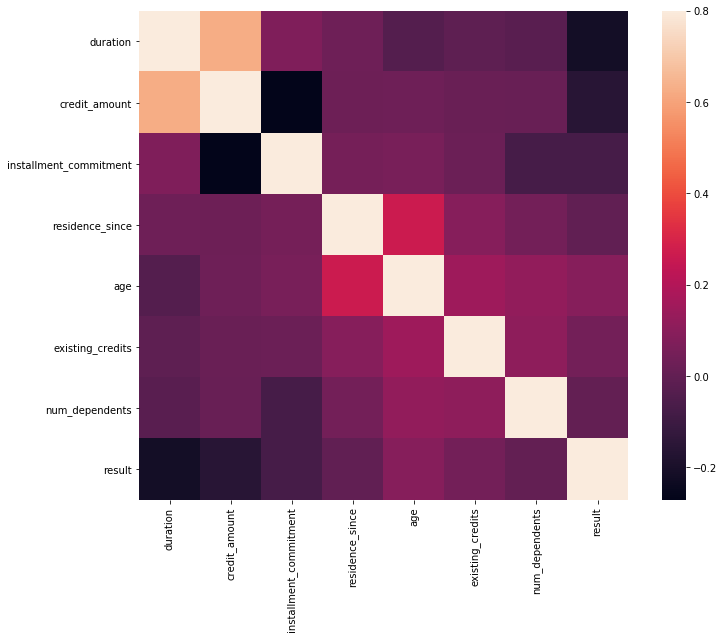

In [30]:
print(creditdf.personal_status.value_counts())
creditdf.hist(figsize=(20,20))
plt.show()

In [17]:
creditdf_dummies = pd.get_dummies(creditdf)
print("Features after get_dummies:\n", list(creditdf_dummies.columns))


Features after get_dummies:
 ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents', 'result', "checking_status_'0<=X<200'", "checking_status_'<0'", "checking_status_'>=200'", "checking_status_'no checking'", "credit_history_'all paid'", "credit_history_'critical/other existing credit'", "credit_history_'delayed previously'", "credit_history_'existing paid'", "credit_history_'no credits/all paid'", "purpose_'domestic appliance'", "purpose_'new car'", "purpose_'used car'", 'purpose_business', 'purpose_education', 'purpose_furniture/equipment', 'purpose_other', 'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining', "savings_status_'100<=X<500'", "savings_status_'500<=X<1000'", "savings_status_'<100'", "savings_status_'>=1000'", "savings_status_'no known savings'", "employment_'1<=X<4'", "employment_'4<=X<7'", "employment_'<1'", "employment_'>=7'", 'employment_unemployed', "personal_status_'female div/dep/mar'", "person

In [18]:

print("The new columns using 'One-Hot-Encoding': ", len(creditdf_dummies.columns))
creditdf_dummies.head()

The new columns using 'One-Hot-Encoding':  62


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,result,checking_status_'0<=X<200',checking_status_'<0',...,housing_own,housing_rent,job_'high qualif/self emp/mgmt',job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,1,0,1,...,1,0,0,0,0,1,0,1,0,1
1,48,5951,2,2,22,1,1,0,1,0,...,1,0,0,0,0,1,1,0,0,1
2,12,2096,2,3,49,1,2,1,0,0,...,1,0,0,0,1,0,1,0,0,1
3,42,7882,2,4,45,1,2,1,0,1,...,0,0,0,0,0,1,1,0,0,1
4,24,4870,3,4,53,2,2,0,0,1,...,0,0,0,0,0,1,1,0,0,1


In [19]:
#features = creditdf_dummies.iloc[:, [0,1,3,4,5,6,7,8,9,10,11]]
features = creditdf_dummies.loc[:, 'duration':'foreign_worker_yes']
X = features.values
y = creditdf_dummies['result'].values
print(X.shape, y.shape)
display(X)

(1000, 62) (1000,)


array([[   6, 1169,    4, ...,    1,    0,    1],
       [  48, 5951,    2, ...,    0,    0,    1],
       [  12, 2096,    2, ...,    0,    0,    1],
       ..., 
       [  12,  804,    4, ...,    0,    0,    1],
       [  45, 1845,    4, ...,    1,    0,    1],
       [  45, 4576,    3, ...,    0,    0,    1]], dtype=int64)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
from sklearn.svm import SVC

In [21]:
svc=SVC(C=10.0000, coef0=1, kernel='poly', degree=3)
svc.fit(X_train, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
train_score = svc.score(X_train, y_train)
print("The training score is:",train_score)
print("--------------------------")
test_score = svc.score(X_test, y_test)
print("The test score is:", test_score)
print("--------------------------")
y_pred = svc.predict(X_test) 
#print(y_pred)
from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
from sklearn.metrics import accuracy_score
print('Accuracy Score :',accuracy_score(y_test,y_pred))

The training score is: 0.997333333333
--------------------------
The test score is: 0.988
--------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98        74
          1       0.99      0.99      0.99       176

avg / total       0.99      0.99      0.99       250

Accuracy Score : 0.988


[[ 73   1]
 [  2 174]]


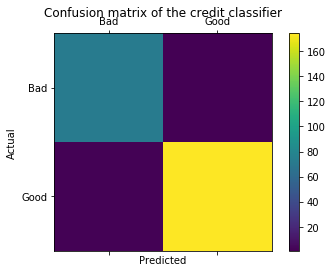

In [23]:
labels = ['Bad', 'Good']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the credit classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()